# Monte Carlo Calculation of Pi

A unit circle is a circle around the origin of the coordinate system (0,0) with radius 1. The area of such a circle is

\begin{equation}
    A_{\textrm{Circle}} = \pi r^2 \, .
\end{equation}

The area of the unit suqare however is

\begin{equation}
    A_{\textrm{Square}} = (2 \cdot r)^2 \, .
\end{equation}

If we calculate the ratio of circle area to square area, we find:

\begin{equation}
    \frac{A_{\textrm{Circle}}}{A_{\textrm{Square}}} = \frac{\pi r^2}{(2 \cdot r)^2} = \frac{\pi}{4} \, .
\end{equation}

Solving above equation for $\pi$ yields:

\begin{equation}
    \pi = 4 \cdot \frac{A_{\textrm{Circle}}}{A_{\textrm{Square}}} \, .
\end{equation}

In other words, we can calculate $\pi$ by considering the ratio of the area of the circle and the are of the square. Unfortunately, we do not know the area of the circle since the value of $\pi$ is what we're trying to figure out.

Instead, we will cover the entire area with points with $x$-values between $-1$ and $1$ and y-values between $-1$ and $1$. These points will either lie inside or outside the circle. The ratio of points inside the circle and the total number of points is equivalent to the ratio of the circle area and the square area:

\begin{equation}
    \frac{A_{\textrm{Circle}}}{A_{\textrm{Square}}} = \frac{N_{\textrm{circle}}}{N_{\textrm{total}}} \, .
\end{equation}

Ideally, we would need to create an infinite amount of data points to ensure that the two ratios are equivalent. Unfortunaetly that is not possible. Instead we will use a Monte Carlo Algorithm.

A Monte Carlo algorithm uses randomness to predict outcomes when a proper simulation is impossible (e.g. because it would take too long). In this case, this means generating a certain number of random data points to calculate the ratio $N_{\textrm{circle}}/N_{\textrm{total}}$.
For a small number of random points, the result will not be very accurate. However, when the number of random points grows larger, the probability of the algorithm finding the correct outcome increases.

##### Libraries

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt  

##### Input Parameters

In [2]:
# Set the total number of random numbers to be generates
nRandom = 500

# Initialize counter for the number of events that fall within the unit circle
inCircle = 0

# Generate empty list to store random points
randomPoints = []

#### Random Number Loop

In [3]:
# Loop over all random numbers
for iNumber in range(0, nRandom):
    # Generate a x- and y-coordinates between 1 and -1
    x = 2.0 * random.random() - 1.0
    y = 2.0 * random.random() - 1.0
    
    # Check whether the point is within the unit circle
    if ((x*x + y*y) <= 1.0):
        
        # Update the number of points inside the circle
        inCircle += 1
        
        # Add point to list
        randomPoints.append([x, y, 1])
    else:
        # Add point to list
        randomPoints.append([x, y, 0])
        

##### Calculate Approximation of Pi

In [4]:
# Calculate the value of pi based on the number of points inside the circle compared to the total number of points
pi = 4.0 * inCircle/nRandom

# Determine divergence from numpy.pi
deviation = 100 / np.pi * np.abs(np.pi - pi)

# Display result
print("With {0} random numbers, we estimate pi to be equal to: {1:10.7f}.\nThis corresponds to a deviation of {2:10.7f}% from numpy.pi = {3:10.7f}.".format(nRandom, pi, deviation, np.pi))

With 500 random numbers, we estimate pi to be equal to:  3.2160000.
This corresponds to a deviation of  2.3684594% from numpy.pi =  3.1415927.


##### Visualization

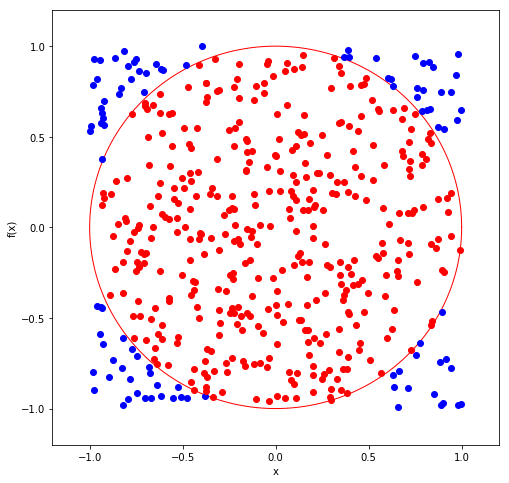

In [5]:
# Initialize figure
fig = plt.figure(figsize=(8, 8))
pl = fig.add_subplot(111)

# Axis limits
pl.set_xlim(-1.2, 1.2)
pl.set_ylim(-1.2, 1.2)

# Plot the unit circle
t = np.linspace(0,np.pi*2,200)
pl.plot(np.cos(t), np.sin(t), linewidth=1, color='r')

# Initialize loop counter
counter = 0

# Plot all the sample points
while counter < len(randomPoints):
    # Colour the points inside the circle red
    if (randomPoints[counter][2] == 1):
        plt.plot(randomPoints[counter][0], randomPoints[counter][1], 'ro')
    # Colour the points outside the circle blue
    else:
        plt.plot(randomPoints[counter][0], randomPoints[counter][1], 'bo')
        
    # Update counter (plot every 1000th data point)
    counter += 1
        
# Set axis labels
plt.xlabel('x')
plt.ylabel('f(x)')



# Show plot
plt.show()

### Bonus:

We can also place the entire code inside an additional loop and run it until the desired level of accurarcy has been reached. (This can take a long time. Reduce the accuracy if the Kernel fails in Binder.)

##### Input Parameters

In [6]:
# Set desired level of accuracy in percentages
desiredAcc = 0.01

# Set current level of accurarcy
currentAcc = 100.0

# Set initial number of random numbers to be generates
nRandom = 100

##### Main

In [7]:
while (currentAcc > desiredAcc):
    
    # Set initial parameters -----------------------------------------
    
    # Set the total number of random numbers to be generates
    nRandom *= 5

    # Initialize counter for the number of events that fall within the unit circle
    inCircle = 0

    # Generate empty list to store random points
    randomPoints = []
    # ----------------------------------------------------------------
    
    # Loop over random numbers ---------------------------------------

    for iNumber in range(0, nRandom):
        # Generate a x- and y-coordinates between 1 and -1
        x = 2.0 * random.random() - 1.0
        y = 2.0 * random.random() - 1.0
    
        # Check whether the point is within the unit circle
        if ((x*x + y*y) <= 1.0):
        
            # Update the number of points inside the circle
            inCircle += 1
        
            # Add point to list
            randomPoints.append([x, y, 1])
        else:
            # Add point to list
            randomPoints.append([x, y, 0])
    # ----------------------------------------------------------------
    
    # Determine pi and the deviation ---------------------------------
    
    # Calculate the value of pi based on the number of points inside the circle compared to the total number of points
    pi = 4.0 * inCircle/nRandom

    # Determine divergence from numpy.pi
    currentAcc = 100 / np.pi * np.abs(np.pi - pi)
    # ----------------------------------------------------------------
    
    
# Display result
print("With {0} random numbers, we estimate pi to be equal to: {1:10.7f}.\nThis corresponds to a deviation of {2:10.7f}% from numpy.pi = {3:10.7f}.".format(nRandom, pi, currentAcc, np.pi))

With 7812500 random numbers, we estimate pi to be equal to:  3.1417231.
This corresponds to a deviation of  0.0041534% from numpy.pi =  3.1415927.


##### Visualization

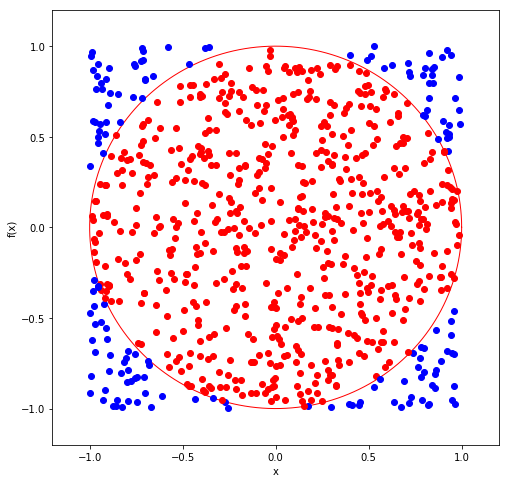

In [8]:
# Initialize figure
fig = plt.figure(figsize=(8, 8))
pl = fig.add_subplot(111)

# Axis limits
pl.set_xlim(-1.2, 1.2)
pl.set_ylim(-1.2, 1.2)

# Plot the unit circle
t = np.linspace(0,np.pi*2,200)
pl.plot(np.cos(t), np.sin(t), linewidth=1, color='r')

# Initialize loop counter
counter = 0

# Plot all the sample points
while counter < len(randomPoints):
    # Colour the points inside the circle red
    if (randomPoints[counter][2] == 1):
        plt.plot(randomPoints[counter][0], randomPoints[counter][1], 'ro')
    # Colour the points outside the circle blue
    else:
        plt.plot(randomPoints[counter][0], randomPoints[counter][1], 'bo')
        
    # Update counter (plot every 1000th data point)
    counter += 10000
        
# Set axis labels
plt.xlabel('x')
plt.ylabel('f(x)')



# Show plot
plt.show()